# Importation des librairies 

In [33]:
import pandas as pd 
from numpy import*
import re
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement et affichage des données

In [29]:
erp = pd.read_csv('erp.csv')
erp.head(2)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock


In [30]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [11]:
web = pd.read_excel('web.xlsx')
web.head(2)

C:\Users\ibenz\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [14]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [23]:
liaison = pd.read_excel('liaison.xlsx')
liaison.head(2)

C:\Users\ibenz\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296


In [24]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [25]:
liaison.describe()

,product_id
count,825.000000
mean,5162.597576
std,902.644635
min,3847.000000
25%,4348.000000
50%,4907.000000
75%,5805.000000
max,7338.000000


#  Analyse de forme (web)

##### Variable target: SKU
#####  Lignes et colonnes:1431,28
##### Types de variables: qualitatif:      quantitatif:
object            11
float64           10
datetime64[ns]     4
int64              3
dtype: int64
#####  Analyse des valeurs manquantes: il y a  4 groupe de colonnes 100% de valeurs manquantes et trois groupes de colonnes avec 50% de valeurs manquantes

In [34]:
web_copie= web.copy()

In [35]:
# Afficher les nombres des colonnes et des lignes dans la dataframe web
web_copie.shape

(1431, 28)

In [36]:
# Afficher les types des données dans la dataframe web
web_copie.dtypes.value_counts()

object            11
float64           10
datetime64[ns]     4
int64              3
dtype: int64

<AxesSubplot:>

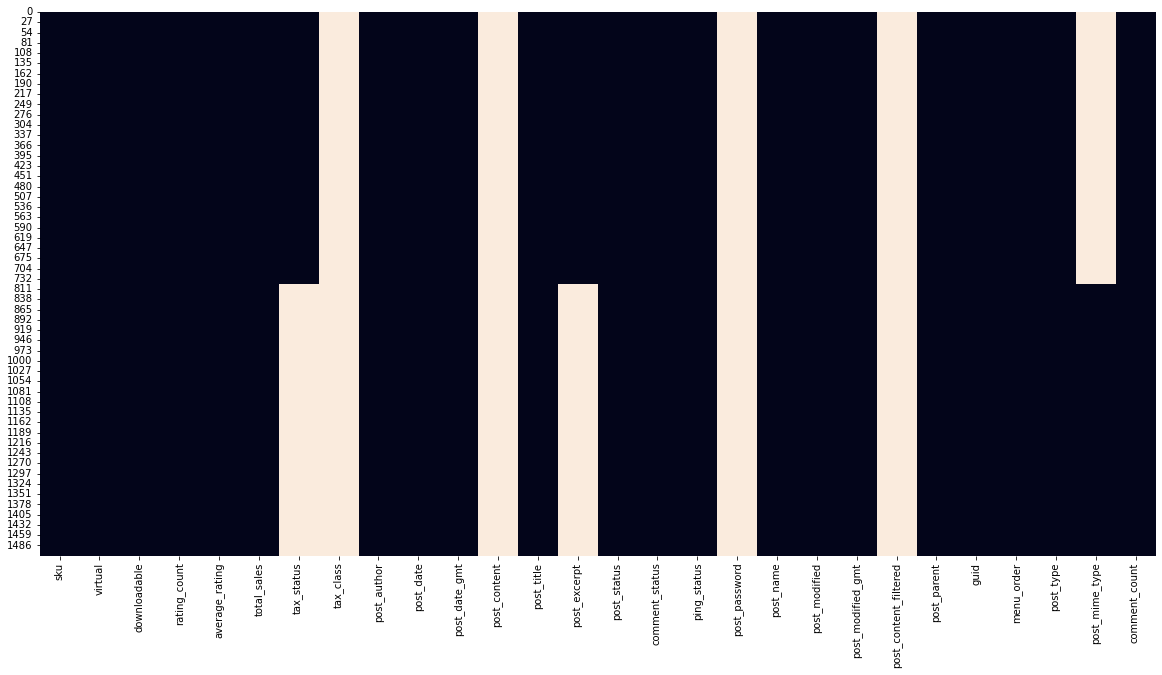

In [37]:
plt.figure( figsize=(20,10))
sns.heatmap( web_copie.isna(), cbar= False)

In [38]:
# Ordre décroissant des valeurs manquantes dans la dataframe web 
(web_copie. isna().sum()/ web_copie.shape [0]). sort_values( ascending=True)

virtual                  0.000000
downloadable             0.000000
rating_count             0.000000
comment_count            0.000699
post_modified_gmt        0.000699
ping_status              0.000699
comment_status           0.000699
post_status              0.000699
post_parent              0.000699
post_title               0.000699
guid                     0.000699
post_date                0.000699
post_name                0.000699
post_author              0.000699
menu_order               0.000699
post_type                0.000699
total_sales              0.000699
average_rating           0.000699
post_date_gmt            0.000699
post_modified            0.000699
sku                      0.002096
tax_status               0.499651
post_excerpt             0.499651
post_mime_type           0.501048
post_content_filtered    1.000000
post_content             1.000000
tax_class                1.000000
post_password            1.000000
dtype: float64

# Analyse du fond

## Visualisation initiale : élimination des colonnes inutiles et nettoyage du fichier web

In [39]:
# Mettre que les valeur <1 donc qui ne sont pas des valeurs manquantes dans la dataframe web
web_copie= web_copie [web_copie.columns[web. isna().sum()/ web.shape [0] <1]]

In [41]:
# Supprimer les doublons dans la dataframe web
web_copie.drop_duplicates(inplace=True)

In [42]:
# afficher les index des lignes 'attachment' dans la colonne 'post_type' 
web_copie[ web_copie['post_type'] == 'attachment' ] .index

Int64Index([ 799,  800,  801,  802,  803,  804,  805,  806,  807,  808,
            ...
            1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512],
           dtype='int64', length=714)

In [44]:
# supprimer les lignes 'aatachment' de la colonne 'post-type'
web_copie.drop( web_copie[ web_copie['post_type'] == 'attachment' ].index , inplace=True)
web_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            717 non-null    int64         
 2   downloadable       717 non-null    int64         
 3   rating_count       717 non-null    int64         
 4   average_rating     716 non-null    float64       
 5   total_sales        716 non-null    float64       
 6   tax_status         716 non-null    object        
 7   post_author        716 non-null    float64       
 8   post_date          716 non-null    datetime64[ns]
 9   post_date_gmt      716 non-null    datetime64[ns]
 10  post_title         716 non-null    object        
 11  post_excerpt       716 non-null    object        
 12  post_status        716 non-null    object        
 13  comment_status     716 non-null    object        
 14  ping_statu

In [46]:
# supprimer les NAN dans la colonne 'SKU'
web_copie= web_copie.dropna(subset=['sku'])
web_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            714 non-null    int64         
 2   downloadable       714 non-null    int64         
 3   rating_count       714 non-null    int64         
 4   average_rating     714 non-null    float64       
 5   total_sales        714 non-null    float64       
 6   tax_status         714 non-null    object        
 7   post_author        714 non-null    float64       
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  post_title         714 non-null    object        
 11  post_excerpt       714 non-null    object        
 12  post_status        714 non-null    object        
 13  comment_status     714 non-null    object        
 14  ping_statu

#  Analyse de forme (erp)

##### Variable target: price
##### Lignes et colonnes: 825,5
##### Types de variables: qualitatif:       quantitatif:
 int64      3
 float64    1
 object     1
 dtype: int64
##### Analyse des valeurs manquantes: pas de NAN ( valeurs manquantes) 

In [48]:
erp_copie= erp.copy()

In [49]:
erp_copie.shape

(825, 5)

In [50]:
erp_copie.dtypes.value_counts()

int64      3
float64    1
object     1
dtype: int64

<AxesSubplot:>

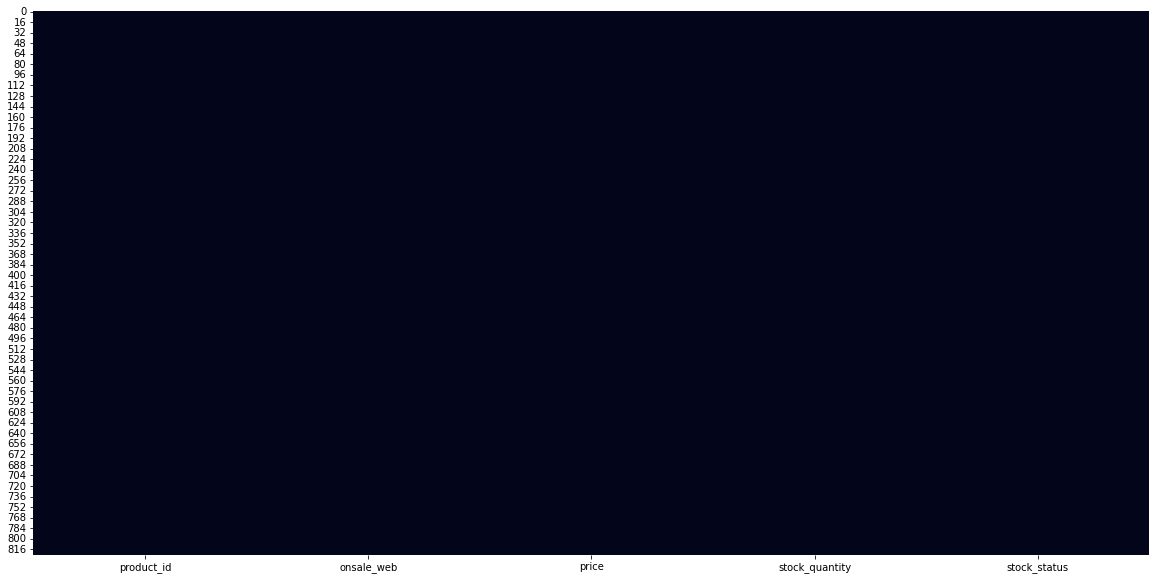

In [51]:
plt.figure( figsize=(20,10))
sns.heatmap( erp.isna(), cbar= False)

In [52]:
erp.drop_duplicates(inplace=True)
erp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 38.7+ KB


#  Analyse de forme (liaison)

##### Variable target: id_web
#####  Lignes et colonnes:825,2
#####  Types de variables: qualitatif:      quantitatif:
int64     1
object    1
dtype: int64
#####  Analyse des valeurs manquantes: un peu de valeurs manquantes 

In [53]:
liaison_copie= liaison.copy()

In [54]:
liaison_copie.shape

(825, 2)

In [55]:
liaison_copie.dtypes.value_counts()

int64     1
object    1
dtype: int64

<AxesSubplot:>

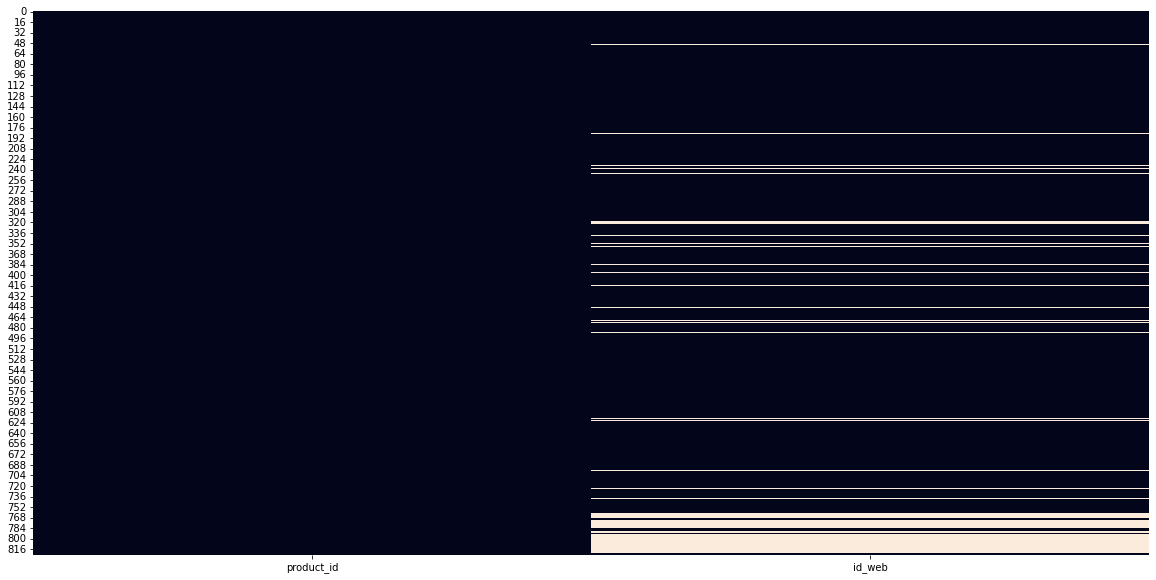

In [56]:
plt.figure( figsize=(20,10))
sns.heatmap( liaison_copie.isna(), cbar= False)

In [59]:
liaison_copie.drop_duplicates(inplace=True)
liaison_copie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 19.3+ KB
